<a href="https://colab.research.google.com/github/SamChakra45/Mathematical_Predictor-ML/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This assignment is based on Support Vector Machines.

**Instructions for this assignment:**

1.   This assignment contains certain questions that you have to answer. The answers may be descriptive. Double-click on the text box and write your solution, which should precisely answer the question. **Remember to make your solution bold before submitting.**
2.   Certain sections of code are missing are have being replaced by 'pass'. You need to replace 'pass' with your block of code by following the instructions provided.  




#Linear SVM

Q1. What type of dataset is expected to be dealt with SVMs, in terms of size and complexity?





In [ ]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC # A module of scikit-learn library used for implementing SVM. SVC stands for Support Vector Classifier
from sklearn.model_selection import train_test_split

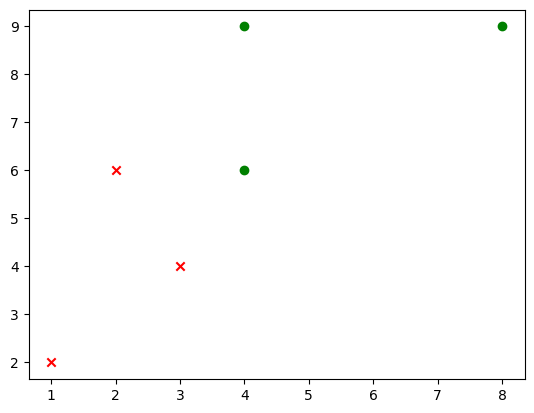

In [ ]:
#Preparation of dataset

x = np.array([[1,2],[4,6],[8,9], [3,4], [2,6], [4,9]])
y = np.array([0, 1, 1, 0, 0, 1])
for i in range(y.shape[0]):
  if (y[i]==0):
      plt.scatter(x[i][0], x[i][1],color='red', marker='x')
  else:
      plt.scatter(x[i][0], x[i][1],color='green', marker='o')

**Answer the following questions** \\
Q1. How many classes is the above dataset expected to be classified into?

Q2. How many features does the input data have?

Q3. What would be the dimension of hyperplane which will be used to classify this dataset?  

**Task 1**: Read about kernel argument of SVC and replace kernal_used by the kernel required for linear SVM.

**A1.The above dataset is to be classified into two classes.**

**A2. Two independent features (x and y)**

**A3. The hyperplane will be two dimensional i.e. a plane**

In [ ]:
kernel_used = 'linear'
Classifier = SVC(gamma = 'auto', kernel = kernel_used)
Classifier.fit(x, y)

SVC(gamma='auto', kernel='linear')

**Task 1:** Find the equation of boundary by using the parameters

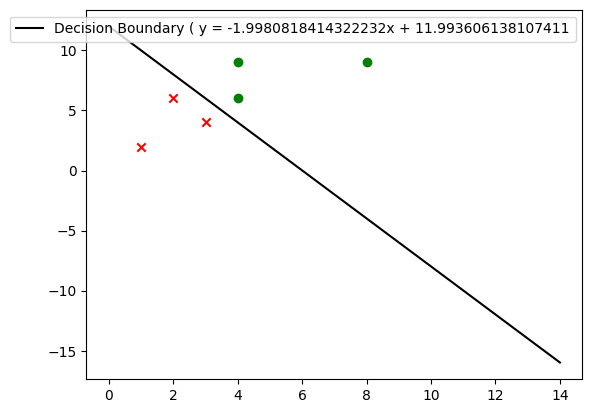

In [ ]:
#####
weight_matrix = Classifier.coef_[0]
slope = -weight_matrix[0]/weight_matrix[1]
bias = - Classifier.intercept_[0]/weight_matrix[1]
val = np.linspace(0, 14)
boundary = slope * val + bias
#####

plt.plot(val, boundary, 'k', label = f"Decision Boundary ( y = "+str(slope)+"x + "+str(bias)) #write the equation for the decision boundary using the variables used above

for i in range(y.shape[0]):
  if (y[i]==0):
      plt.scatter(x[i][0], x[i][1],color='red', marker='x')
  else:
      plt.scatter(x[i][0], x[i][1],color='green', marker='o')

plt.legend()
plt.show()

#Non- Linear SVM

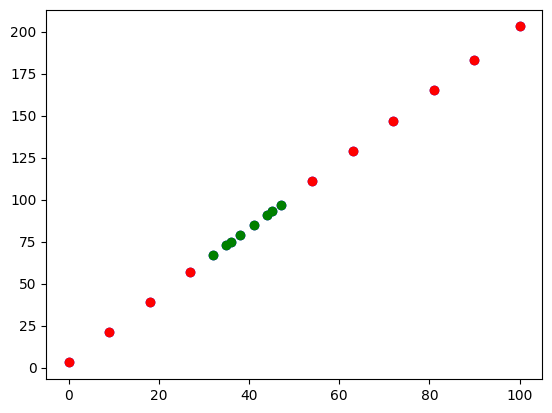

In [ ]:
#Preparation of dataset
x1 = np.linspace(0, 100, 12, dtype=int)
x1 = np.append(x1, np.linspace(30, 50, 8, dtype=int))
x1 = np.sort(x1)
x1 = np.delete(x1, np.where(x1 == 30))
x1 = np.delete(x1, np.where(x1 == 50))
n = x1.size
x2 = 2*x1+3
coordinates = np.column_stack((x1, x2))
label = np.zeros(n, dtype=int)
plt.scatter(x1, x2, color="blue")
for i in range(n):
  if(30<x1[i]<50):
    label[i]=1
    plt.scatter(x1[i],x2[i],color="green")
  else:
    label[i]=0
    plt.scatter(x1[i],x2[i],color="red")

**Answer the following questions** \\
Q: Is the above dataset linearly separable?

Q. How many classes are there in the above dataset?

Q. How many features are used in the above dataset?

Q. What will be dimension of hyperplane used for this dataset?  

**A1. The dataset is not linearly separable**

**A2. There are two classes in the above dataset**

**A3. There are two features in the above dataset.**

**A4. The hyperplane will be two dimensional after using rbf kernel.**

#Splitting the Dataset
**Task**: Split the given dataset into training and testing data. The code snippet to illustrate the data has been given.

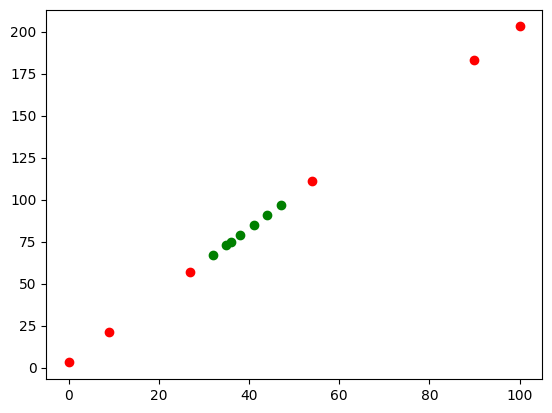

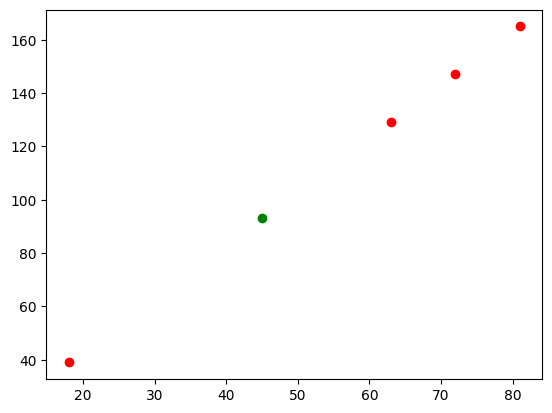

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(coordinates,label,random_state=104,test_size=0.25,shuffle=True)

for i in range (X_train.T[0].size):
  if(Y_train[i]==1):
    plt.scatter(X_train[i][0], X_train[i][1], color="green")
  else:
    plt.scatter(X_train[i][0], X_train[i][1], color="red")
plt.show()

for i in range (X_test.T[0].size):
  if(Y_test[i]==1):
    plt.scatter(X_test[i][0], X_test[i][1], color="green")
  else:
    plt.scatter(X_test[i][0], X_test[i][1], color="red")
plt.show()

#Non Linear Classifier
**Task 1**: Generate a classifier for the above dataset using suitable kernel function. Also, provide an explanation for your choice of kernel. \\
**Task 2**: Explain and illustrate, using plots, how the kernel used, enables the data to be classified using a SVC.

**I have used the polynomial kernel for the transformation, noting that all the green points are clustered in the same region centering the x=40 and y=83 mark. Hence a three degree polynomial should approximate the distribution well and also prevent overfitting**

In [ ]:
Classifier = SVC(gamma='auto',kernel = 'poly',degree=3)
Classifier.fit(X_train, Y_train)


SVC(gamma='auto', kernel='poly')

**We can see that the predictions are correct.**

In [ ]:
y_pred = Classifier.predict(X_test)
print(y_pred)
print(Y_test)

[0 0 0 0 1]
[0 0 0 0 1]


**We can thus see the rough boundaries of the plot, by checking for random points in the 2 dimensional domain**

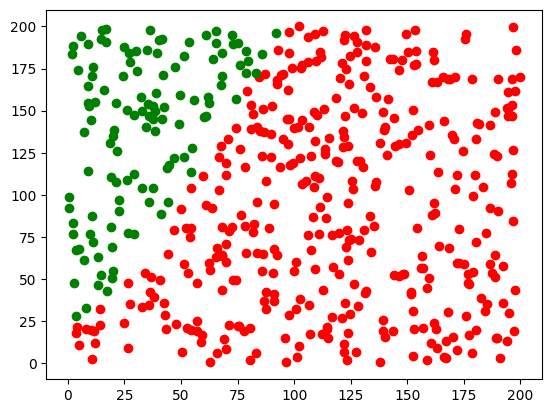

In [ ]:
#Taking some random points in the domain

import numpy as np

# Generate random coordinates
coordinates = np.random.uniform(0, 200, size=(500,2))

y_pred = Classifier.predict(coordinates)

# Display the coordinates
for i in range(500):
    if(y_pred[i]==1):
      plt.scatter(coordinates[i][0],coordinates[i][1],color='green')
    else:
      plt.scatter(coordinates[i][0],coordinates[i][1],color='red')
plt.show()
